<h2><a href="https://leetcode.com/problems/regions-cut-by-slashes">959. Regions Cut By Slashes</a></h2><h3>Medium</h3><hr><p>An <code>n x n</code> grid is composed of <code>1 x 1</code> squares where each <code>1 x 1</code> square consists of a <code>&#39;/&#39;</code>, <code>&#39;\&#39;</code>, or blank space <code>&#39; &#39;</code>. These characters divide the square into contiguous regions.</p>

<p>Given the grid <code>grid</code> represented as a string array, return <em>the number of regions</em>.</p>

<p>Note that backslash characters are escaped, so a <code>&#39;\&#39;</code> is represented as <code>&#39;\\&#39;</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2018/12/15/1.png" style="width: 200px; height: 200px;" />
<pre>
<strong>Input:</strong> grid = [&quot; /&quot;,&quot;/ &quot;]
<strong>Output:</strong> 2
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2018/12/15/2.png" style="width: 200px; height: 198px;" />
<pre>
<strong>Input:</strong> grid = [&quot; /&quot;,&quot;  &quot;]
<strong>Output:</strong> 1
</pre>

<p><strong class="example">Example 3:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2018/12/15/4.png" style="width: 200px; height: 200px;" />
<pre>
<strong>Input:</strong> grid = [&quot;/\\&quot;,&quot;\\/&quot;]
<strong>Output:</strong> 5
<strong>Explanation: </strong>Recall that because \ characters are escaped, &quot;\\/&quot; refers to \/, and &quot;/\\&quot; refers to /\.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == grid.length == grid[i].length</code></li>
	<li><code>1 &lt;= n &lt;= 30</code></li>
	<li><code>grid[i][j]</code> is either <code>&#39;/&#39;</code>, <code>&#39;\&#39;</code>, or <code>&#39; &#39;</code>.</li>
</ul>


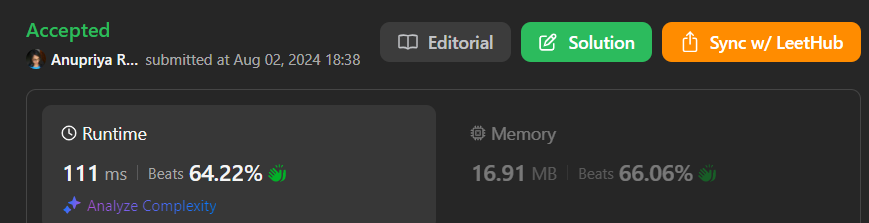

In [2]:
from typing import List

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [1]* n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, a, b):
        # self.parent[self.find(b)] = self.find(a)
        rootA = self.find(a)
        rootB = self.find(b)
        if self.rank[rootA] > self.rank[rootB]:
            self.parent[rootB] = rootA
        elif self.rank[rootA] < self.rank[rootB]:
            self.parent[rootA] = rootB
        else:
            self.parent[rootB] = rootA
            self.rank[rootA] += 1


class Solution:
    def regionsBySlashes(self, grid: List[str]) -> int:
        n = len(grid)
        uf = UnionFind(4 * n * n)
        for i in range(n):
            for j in range(n):
                root = 4 * (i * n  + j)
                cell = grid[i][j]
                if cell == '/':
                    uf.union(root + 0, root + 3)
                    uf.union(root +1, root + 2)
                elif cell == '\\':
                    uf.union(root + 0, root + 1)
                    uf.union(root + 3, root + 2)
                else:
                    uf.union(root + 0, root + 1)
                    uf.union(root + 1, root + 2)
                    uf.union(root + 2, root + 3)

                if j + 1 < n:
                    uf.union(root + 1, 4*(i*n +j + 1) + 3)

                if i + 1 < n:
                    uf.union(root + 2, 4*((i + 1)* n + j) + 0)

        return sum(uf.find(x)== x for x in range(4*n*n))